# Example of optimizing a convex function

# Goal is to test the objective values found by HyperOpt

# Benchmarking test with different iterations for serial executions

In [1]:
# def get_param_dict():
#     param_dict = {"learning_rate": uniform(0, 1),
#               "gamma": uniform(0, 5),
#               "max_depth": range(1,10),
#               "n_estimators": range(1,300),
#                "booster":['gbtree','gblinear','dart']
#              }
#     return param_dict

In [1]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space = {
            'gamma': hp.uniform('gamma', 0, 5),
            "learning_rate": hp.uniform("learning_rate", 0, 1),
            'max_depth':  1+ hp.randint('max_depth', 10),
            'n_estimators': 1+ hp.randint('n_estimators', 300),
             "booster":hp.choice('booster',['gbtree','gblinear','dart'] ) 
        }



In [2]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.datasets import load_wine

X, Y = load_wine(return_X_y=True)

def objective(args_list):
    global X, Y
    #print(args_list)
    clf = XGBClassifier(**args_list)
    result = cross_val_score(clf, X, Y, scoring='accuracy').mean()
    return {'loss': -1.0*result, 'status': STATUS_OK }


In [3]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 20

In [4]:

#Since 5 random were tried in Bayesian, here we add 5 extra

import warnings
warnings.filterwarnings("ignore")

for i in range(num_of_tries):
    
    trials = Trials()
    best_10 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=15)
    best_10 = -1.0*min(trials.losses())
    
    
    trials = Trials()
    best_20 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=25)
    best_20 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_30 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=35)
    best_30 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_40 = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=45)
    best_40 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_50 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=55)
    best_50 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_60 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=65)
    best_60 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_70 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=75)
    best_70 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_80 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=85)
    best_80 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_90 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=95)
    best_90 = -1.0*min(trials.losses())
    
    trials = Trials()
    best_100 = fmin(fn=objective, space=space, algo=tpe.suggest,trials=trials, max_evals=105)
    best_100 = -1.0*min(trials.losses())
    
    print(i,':',[best_20,best_40,best_60])
    Store_Optimal_X.append([best_10, best_20,best_30,best_40,best_50,best_60,best_70,best_80,best_90,best_100])
    

100%|██████████| 105/105 [00:32<00:00,  3.21it/s, best loss: -0.9331417624521072]
0 : [0.9220306513409962, 0.9331417624521072, 0.9331417624521072]
100%|██████████| 105/105 [00:35<00:00,  2.94it/s, best loss: -0.9275862068965517]
1 : [0.9331417624521072, 0.9275862068965517, 0.9275862068965517]
100%|██████████| 105/105 [00:39<00:00,  2.63it/s, best loss: -0.9331417624521072]
2 : [0.9220306513409962, 0.9164750957854406, 0.9220306513409962]
100%|██████████| 105/105 [00:37<00:00,  2.78it/s, best loss: -0.9220306513409962]
3 : [0.9164750957854406, 0.9331417624521072, 0.9220306513409962]
100%|██████████| 105/105 [00:58<00:00,  1.79it/s, best loss: -0.9275862068965517]
4 : [0.9164750957854406, 0.9275862068965517, 0.9275862068965517]
100%|██████████| 105/105 [00:49<00:00,  2.12it/s, best loss: -0.9331417624521072]
5 : [0.9164750957854406, 0.9331417624521072, 0.9164750957854406]
100%|██████████| 105/105 [00:37<00:00,  2.83it/s, best loss: -0.9275862068965517]
6 : [0.9275862068965517, 0.916475095

100%|██████████| 105/105 [00:59<00:00,  1.75it/s, best loss: -0.9331417624521072]
18 : [0.9164750957854406, 0.9275862068965517, 0.9331417624521072]
100%|██████████| 105/105 [00:43<00:00,  2.41it/s, best loss: -0.9275862068965517]
19 : [0.9164750957854406, 0.9275862068965517, 0.9275862068965517]


In [9]:
import numpy as np
plotting_array = np.array(Store_Optimal_X)

In [10]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

Y = []

for i in range(len(plotting_itr)):
    y_value = plotting_array[:,i].mean()
    Y.append(y_value)

In [11]:
Y

[0.9153256704980842,
 0.9214750957854406,
 0.9236877394636016,
 0.9259195402298852,
 0.9270306513409959,
 0.9256417624521072,
 0.925919540229885,
 0.9245306513409963,
 0.9264750957854405,
 0.9300862068965516]

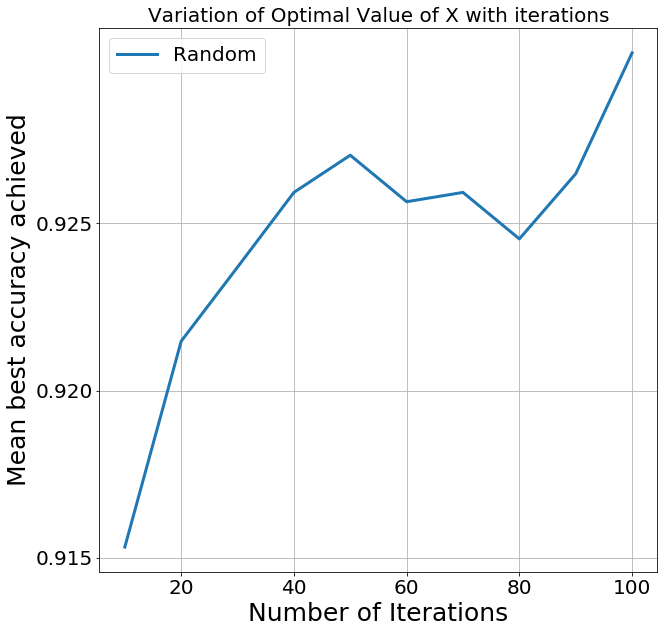

In [12]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'Random',linewidth=3.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean best accuracy achieved',fontsize=25)
plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(0.915, 0.925, step=0.005))
plt.legend(fontsize=20)
plt.show()

# Generating the final plots

In [14]:
Y_Random = [0.9142241379310345,
 0.9164750957854407,
 0.9184195402298851,
 0.9189655172413793,
 0.9189655172413793,
 0.9195306513409962,
 0.9198084291187738,
 0.9217528735632184,
 0.922030651340996,
 0.922030651340996]

In [13]:
Y_hyperOpt=[0.9153256704980842,
 0.9214750957854406,
 0.9236877394636016,
 0.9259195402298852,
 0.9270306513409959,
 0.9256417624521072,
 0.925919540229885,
 0.9245306513409963,
 0.9264750957854405,
 0.9300862068965516]

In [15]:
Y_mango = [0.9217528735632184,
 0.9253639846743293,
 0.9261973180076627,
 0.9281417624521072,
 0.9286973180076628,
 0.9289750957854406,
 0.9298084291187738,
 0.9298084291187738,
 0.9306417624521071,
 0.9306417624521071]

In [16]:
Y_parallel=[0.9259195402298852,
 0.9278639846743296,
 0.9289750957854406,
 0.929808429118774,
 0.9311973180076627,
 0.9325862068965515,
 0.9328639846743293,
 0.9328639846743293,
 0.9328639846743293,
 0.9331417624521071]

In [17]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]



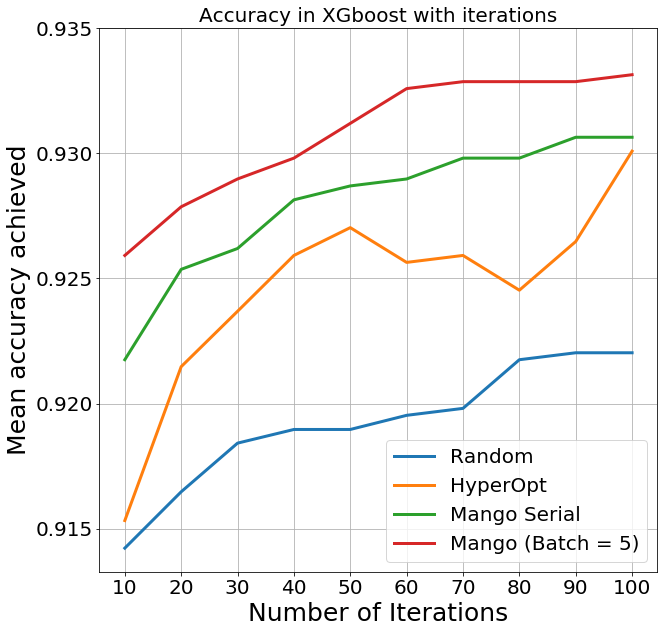

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y_Random,label = 'Random',linewidth=3.0) #x, y
plt.plot(plotting_itr,Y_hyperOpt,label = 'HyperOpt',linewidth=3.0) #x, y
plt.plot(plotting_itr,Y_mango,label = 'Mango Serial',linewidth=3.0) #x, y
plt.plot(plotting_itr,Y_parallel,label = 'Mango (Batch = 5)',linewidth=3.0) #x, y




plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel('Mean accuracy achieved',fontsize=25)
plt.title('Accuracy in XGboost with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.yticks(np.arange(0.915, 0.935, step=0.005))
plt.xticks(np.arange(10, 110, step=10))
plt.legend(fontsize=20)
plt.show()